### Installations

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# uncomment if not installed

# !pip install wordcloud
# !pip install nltk

### Import Relevant Libraries

In [3]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from nltk.stem import WordNetLemmatizer
import string
import nltk

### Read Data File

In [4]:
nb_name = "1.0-jp-initial-data-exploration"

dataset_1 = 'preprocessed_data_query-sdg-full-regexp_2022-03-15.csv' # _1, _2 etc.. as need to list more than one data set being read in

In [5]:
df = pd.read_csv('../../data/processed/'+dataset_1)

C:\Users\jesse\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (10,11,26) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
df[['title','content']].head()

,title,content
0,Autonomy and accountability in the regulation ...,This article examines the struggles of the Sou...
1,Intellectuals under fire,Looks at the status of intellectuals in South ...
2,Mode 2 knowledge and institutional life: takin...,This paper examines the response of a black un...
3,Political symbolism as policy craft : explaini...,The policy literature in developing countries ...
4,School curriculum since apartheid : intersecti...,In the wake of South Africa's first non-racial...


### Helper Functions

In [7]:
# Helper function to print 

#TODO: Change naming and comment on code

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        cloud_text = " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()
    
# Helper function to visualize the topics/themes
def wordcloud_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        cloud_text = " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        # Create the wordcloud object
        wordcloud = WordCloud(width=480, height=480, margin=0,background_color = 'white').generate(cloud_text)
        fig1, ax1 = plt.subplots()
        # Display the generated image:
        ax1.imshow(wordcloud, interpolation='bilinear')
        ax1.axis("off") 
        plt.tight_layout(pad = 0) 
        plt.title("Topic %s" % topic_idx,fontsize = 12)
        plt.savefig("Topic %s.png" % topic_idx)

def fit_LDA(X, n_components):
    lda_tfidf = LatentDirichletAllocation(n_components= n_components,    random_state=0).fit(X)

    return lda_tfidf


def tokenize(text): ## This just tokenizes the sentences to words and removes individual punctuations.
    punctuations = list(string.punctuation)
    tokens = nltk.word_tokenize(text)
    tokens = [x for x in tokens if x not in punctuations]
    stems = []
    for item in tokens:
        stems.append(WordNetLemmatizer().lemmatize(item, pos="v")) # Change this stemmer/lemmatizer and see what happens
    return stems


In [8]:
# extract documents and drop nans if present to prevent an error
documents = df.content.dropna()

# set up vectorisor the abstracts. Here features are limited to 5000 and common words are removed
vectorizer_tfidf_limit = TfidfVectorizer(max_features=5000,stop_words='english',tokenizer=tokenize)

# vectorise 
vectorizer_tfidf_limit.fit(documents)

X_dtm_tfidf_limit = vectorizer_tfidf_limit.transform(documents)

tfidf_feature_names_limit = vectorizer_tfidf_limit.get_feature_names()

C:\Users\jesse\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
C:\Users\jesse\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['make'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [9]:
# number of themes
n_components = 17

# number of top words considered
num_top_words= 20

Topic #0: surface structure use materials temperature phase properties energy film magnetic state high layer field result model electron transition reaction process
Topic #1: peer review ’ article s research paper “ ” ‘ data science language new work '' `` publish book 's
Topic #2: species sequence genome plant genes strain isolate gene microbial record genetic diversity version host genomes bacteria bacterial populations sample use
Topic #3: model use network method data algorithm propose problem approach paper design result performance systems present set time base algorithms learn
Topic #4: ’ article south africa social political s policy government african public law economic paper state right ‘ development research argue
Topic #5: patients p treatment 95 ci clinical study risk patient disease group use mortality years outcomes months case care associate cancer
Topic #6: health care research students study school use education practice experience learn service social ’ support data

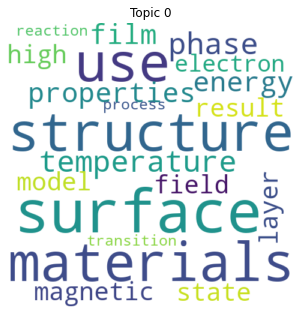

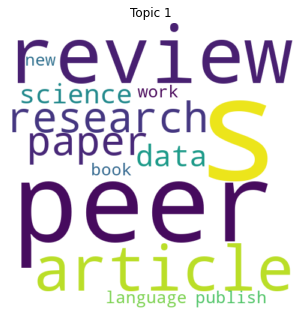

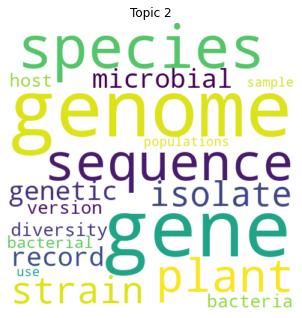

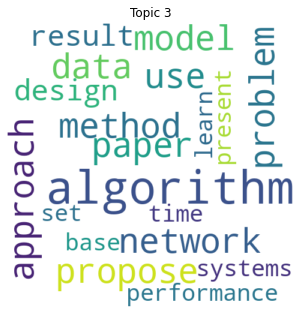

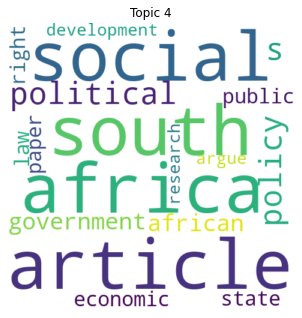

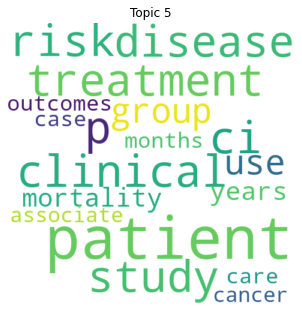

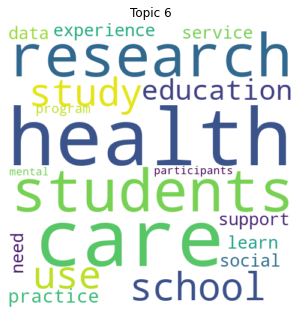

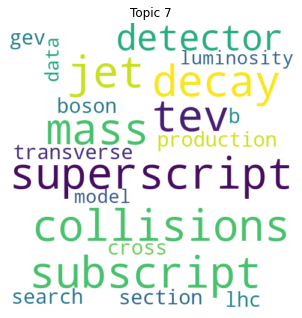

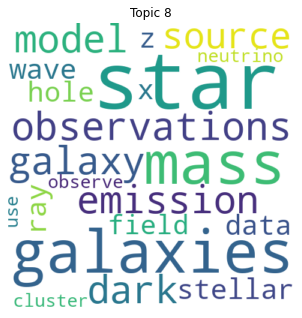

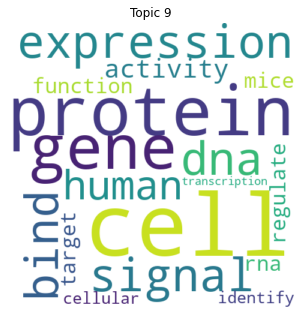

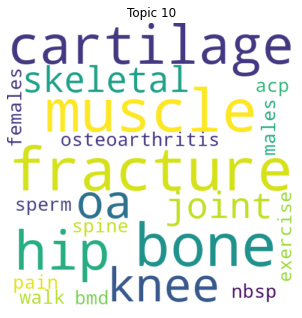

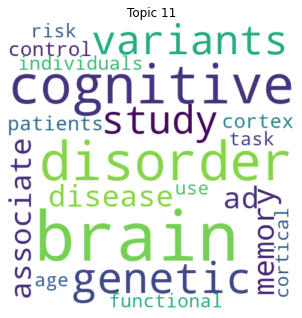

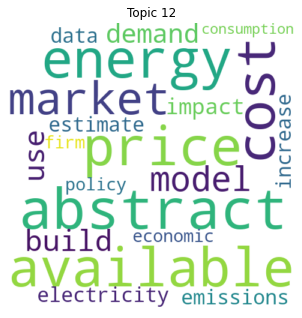

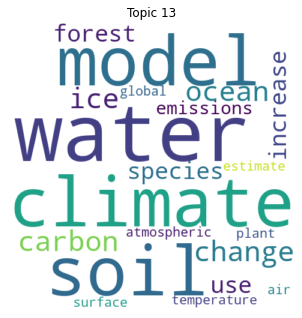

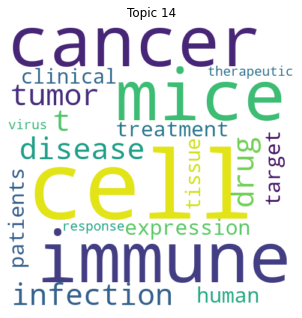

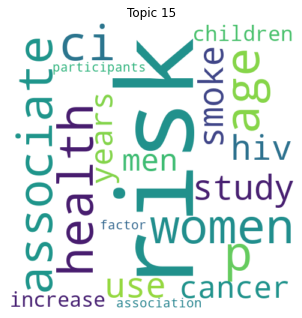

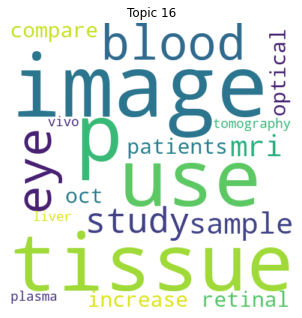

In [10]:
# fit and transform LDA model
lda_tfidf_limit = fit_LDA(X_dtm_tfidf_limit, n_components)
X_lda_tfidf_limit_membership = lda_tfidf_limit.transform(X_dtm_tfidf_limit)

# Print new topics
print_top_words(lda_tfidf_limit, tfidf_feature_names_limit, num_top_words)
wordcloud_top_words(lda_tfidf_limit, tfidf_feature_names_limit, num_top_words)